# Segundo parcial - Algorítmica numérica

## Segunda Parte: **Preguntas de desarrollo** - con apuntes, 60min, total 5 puntos

## Ejercicio 1 (3 puntos)



Cuando se pretende calcular numéricamente la integral de una función con ruido, los métodos basados en interpolación no funcionan bien. Observa por ejemplo el siguiente *dataset*, que representa distintas medidas de la velocidad de despegue $y$ (m/s) de una nave espacial en varios instantes de tiempo $x$. Una vez cargado el dataset ejecutando la siguiente celda, en una lista ```x``` tendrás los valores del tiempo y en una lista ```y``` los de la velocidad.

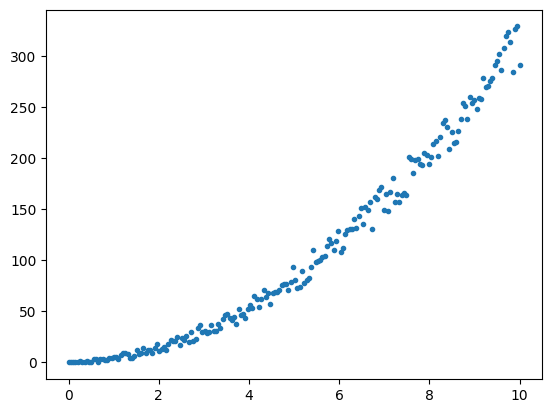

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(10)
x = np.linspace(0,10, 200)
y = np.array([3*i*i - i + (0.5*i)*10*random.random() for i in x])

plt.plot(x,y, '.')

Si el objetivo fuese determinar el espacio recorrido por la nave $s$ en función del tiempo, se debería calcular la magnitud:
$$
s(x) = \int_0^x \hat{y}(r) dr
$$
es decir, la integral respecto a la función definida implícitamente por los datos recogidos de la velocidad $\hat{y}$. Para esta integral, los métodos basados en interpolación (trapecio, Simpson, etc.) pueden no funcionar bien, debido al ruido. Existe la opción de ajustar los datos a una función arbitrariamente compleja, y entonces resolver la integral numérica o analíticamente. Sin embargo, la opción más usada, por ser la más económica, es la que se explica en el siguiente algoritmo. 

**Algoritmo -** Se parte de una división en subintervalos, con un paso $h$ constante. A continuación, se ajustan linealmente los puntos contenidos en cada subintervalo. Después, se calcula el área bajo la recta de cada subintervalo. Sumando estas áreas parciales de forma apropiada se obtiene la integral buscada.

La siguiente imagen recoge de forma esquemática el funcionamiento de este método con tres subintervalos.

<center>

<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=parcial2-parte2-ej1.png&t=uUN2zLwySDMVv82&scalingup=0" width="250"/>
</div>

</center>




El ejercicio plantea implementar el algoritmo descrito anteriormente. Los datos de entrada son los dos arrays anteriores que contienen las variables independientes y dependientes del problema (en este caso, el tiempo $x$ y la velocidad $y$). El objetivo final es calcular un nuevo array ```area_y```, en el que un elemento genérico ```area_y[i]``` represente el área bajo la función entre $0$ y $x_{i+1}$, calculada según el algoritmo explicado anteriormente. Para ello, sigue los siguientes pasos:

 - **(a) [1 punto] -**  Completa el siguiente bloque de código, que pretende calcular dos nuevos arrays ```slopes``` e ```intercepts```, que almacenen respectivamente las pendientes y los términos independientes de las rectas de regresión para cada subintervalo. Se fija un paso $h=0.5$. **Las lineas de código marcadas con ```##########``` indican que ahí falta algo**.


In [10]:
from scipy import stats

# Goals: slopes and intercepts of each subinterval
slopes = []
intercepts = []

# Local lists to store the points that belongs to each subinterval
local_x_to_fit = []
local_y_to_fit = []

h = 0.5
x_right = h  # this variable has the purpose of storing the right limit of the subintervals. Has to be updated
for i in range(len(x)):
    # Entering the following 'if' means that no more points has to be added to this subinterval -> proceed to fit the line, increment 'x_right' and reinitialize the lists
    if #######: 
        
        # Computation of the regression line
        res = stats.linregress(local_x_to_fit, local_y_to_fit)
        slopes.append(res.slope)  # stores the slope of the regression line
        intercepts.append(res.intercept)  # stores the intercept of the regression line

        local_x_to_fit = [] 
        #######
        #######

    #######
    #######

In [71]:
from scipy import stats

# Goals: Slopes and intercepts of each subinterval
slopes = []
intercepts = []

# Local lists to store the points that belongs to each subinterval
local_x_to_fit = []
local_y_to_fit = []

h = 0.5
x_right = h  # this variable has the purpose of storing the right limit of the subintervals. Has to be updated

for i in range(len(x)):
    # Add the current points to the local lists
    local_x_to_fit.append(x[i])
    local_y_to_fit.append(y[i])

    # Entering the following 'if' means that no more points has to be added to this subinterval
    # -> proceed to fit the line, increment 'x_right' and reinitialize the lists
    if x[i] >= x_right:
        # Computation of the regression line
        res = stats.linregress(local_x_to_fit, local_y_to_fit)
        slopes.append(res.slope)        # stores the slope of the regression line
        intercepts.append(res.intercept) # stores the intercept of the regression line
        
        # Reinitialize the lists for the next subinterval
        local_x_to_fit = []
        local_y_to_fit = []
        
        # Update the right limit for the next subinterval
        x_right += h


En este punto, asume que tienes en una lista ```slopes``` las pendientes de todas las rectas de regresión, y en otra ```intercepts``` los correspondientes términos independientes de dichas rectas. De esta forma, la recta de regresión en un subintervalo ```i``` sería $y=$ ```slopes[i]```$\cdot x$ + ```intercepts[i]```.

 - **(b) [1 punto] -**  Completa el siguiente bloque de código para calcula las áreas parciales y almacenarlas acumulativamente en un array ```area_y```. Recuerda que el área $A$ de un trapecio de bases $b_1$ y $b_2$ y altura $h$ viene dada por: $A = 0.5 \cdot h \cdot \left( b_1 + b_2 \right)$. Contesta también a la siguiente pregunta: ¿qué espacio habrá recorrido la nave espacial en los 10 segundos?


In [ ]:
#Goal: cumulative area
area_y = []

#Limits of the subintervals. Have to be updated
x_left = 0
x_right = h

for i in range(len(slopes)):

    #Bases of the trapezoid
    b1 = ###
    b2 = ######

    if len(area_y) == 0:
        area_y.append(######) 
    
    area_y.append(######)

    ######
    ######

In [75]:
#Goal: cumulative area
area_y = []

#Limits of the subintervals. Have to be updated
x_left = 0
x_right = h

for i in range(len(slopes)):

    a = slopes[i]
    b = intercepts[i]

    # ax + b

    #Bases of the trapezoid
    b1 = a * x_left + b
    b2 = a * x_right + b

    local_area =(h / 2) * (b1 + b2)

    if len(area_y) == 0:
        area_y.append(local_area)
    
    area_y.append(area_y[-1] + local_area)

    x_left += h
    x_right += h


print(area_y)
print(f'el espacio recorrido por el cohete en 10s ha sido de {area_y[-1]} m')

[np.float64(0.28242606123325), np.float64(0.5648521224665), np.float64(2.1717507041446638), np.float64(5.587457533650477), np.float64(11.31940018895968), np.float64(20.39976985768415), np.float64(33.55583737782525), np.float64(50.974299412199635), np.float64(73.70497464800398), np.float64(104.53326936345823), np.float64(141.67913351802474), np.float64(183.83236315024908), np.float64(238.97277681469012), np.float64(303.84554164054174), np.float64(380.99935372017046), np.float64(463.0181268505335), np.float64(561.1311454967209), np.float64(670.6687018603271), np.float64(790.237027768433), np.float64(925.8222229084178), np.float64(1079.8537666131174)]
el espacio recorrido por el cohete en 10s ha sido de 1079.8537666131174 m


 - **(c) [1 punto] -** En base a la idea anterior, desarrolla un procedimiento para evaluar la **derivada** de funciones discretas con ruido, como la manejada anteriormente. Comienza describiendo el algoritmo (con palabras). Después, programa una función ```noisy_derivation(x, y)```, cuyos parámetros de entrada sean dos arrays ```x, y``` con los valores de la variable independiente y dependiente (respectivamente). Dicha función debe devolver la función derivada como un nuevo array. Utilízala sobre el *dataset* dado para calcular la aceleración de la nave espacial en $t=5\text{s}$. *(Pista: puedes reutilizar gran parte del código anterior para programar esta función)*.

In [77]:
def noisy_derivation(x, y):
    # Lista para almacenar la derivada
    derivative = []
    
    # Iterar sobre los puntos consecutivos
    for i in range(len(x) - 1):
        # Calcular delta_x y delta_y
        delta_x = x[i+1] - x[i]
        delta_y = y[i+1] - y[i]
        
        # Calcular la derivada en el subintervalo
        derivative_value = delta_y / delta_x
        derivative.append(derivative_value)
    
    return derivative


acceleration = noisy_derivation(x, y)
print(acceleration)

[np.float64(1.2951990422197943), np.float64(3.088729044501794), np.float64(-2.935670685031072), np.float64(13.230227926963424), np.float64(4.680080705787725), np.float64(-0.3272543390144339), np.float64(-13.036342543901712), np.float64(16.480046440101617), np.float64(-4.514183792251033), np.float64(-0.3856210806339698), np.float64(42.07092531443377), np.float64(9.855826232759261), np.float64(-54.12841047198365), np.float64(60.385459509556206), np.float64(-11.600117490944092), np.float64(-11.037450114913597), np.float64(-2.4460559795993344), np.float64(40.915669629623), np.float64(-12.769987444370829), np.float64(30.066586181845018), np.float64(6.088619580650451), np.float64(-49.38385562685196), np.float64(79.45767228320548), np.float64(35.673668413462394), np.float64(9.670864842638771), np.float64(-34.75259116848741), np.float64(-66.76735148560464), np.float64(1.8839920318853844), np.float64(26.451261064067978), np.float64(129.61879664905973), np.float64(-86.01097369537143), np.float64

In [78]:
# Encontrar el índice más cercano a t = 5
target_time = 5
index = np.argmin(np.abs(x - target_time))

# Aceleración en t = 5 segundos (ten en cuenta que `acceleration` tiene un elemento menos que `x` y `y`)
acceleration_at_5s = acceleration[index]

print(f"La aceleración aproximada en t = {target_time} segundos es {acceleration_at_5s:.2f} m/s²")


La aceleración aproximada en t = 5 segundos es -242.91 m/s²


Para desarrollar un procedimiento para evaluar la derivada de funciones discretas con ruido, podemos utilizar un enfoque similar al cálculo de pendientes en subintervalos, pero ahora enfocado en obtener la tasa de cambio instantánea en cada punto. El proceso consiste en dividir el dominio en pequeños intervalos y calcular la pendiente entre puntos adyacentes, lo que nos da una aproximación de la derivada.

## Ejercicio 2 (2 puntos)

La relación entre la tensión $\sigma$ y la deformación $\varepsilon$ de algunos materiales en tensión uniaxial viene dada por la expresión:

$$
\frac{d \sigma}{d \varepsilon}=a+b \sigma
$$

donde $a$ y $b$ son constantes ($d \sigma /d \varepsilon$ se llama *módulo tangente*). La siguiente tabla muestra los resultados de un ensayo de tracción en un material de este tipo:

<center>

| Strain $\varepsilon$ | Stress $\sigma$ |
|---------|-------|
| 0 | 0 | 
| 0.05 | 0.252 | 
| 0.10 | 0.531 | 
| 0.15 | 0.840 | 
| 0.20 | 1.184 | 
| 0.25 | 1.558 | 
| 0.30 | 1.975 | 
| 0.35 | 2.444 | 
| 0.40 | 2.943 | 
| 0.45 | 3.500 | 
| 0.50 | 4.115 |

</center>

Dichos resultados corresponden con los almacenados en las siguientes dos listas:

In [52]:
epsilon = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
sigma = [0.0, 0.252, 0.531, 0.840, 1.184, 1.558, 1.975, 2.444, 2.943, 3.500, 4.115]

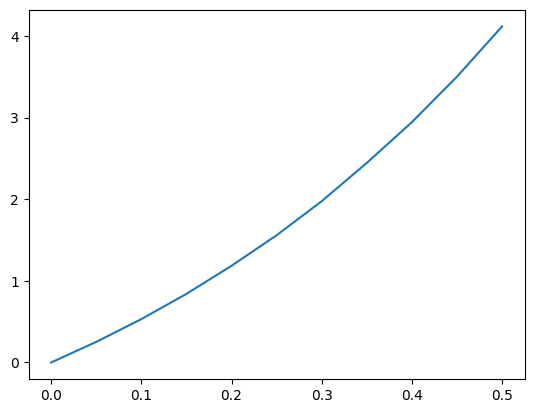

In [7]:
import matplotlib.pyplot as plt

plt.plot(epsilon, sigma)

plt.show()

Determina los parámetros $a$ y $b$ por regresión lineal. Si necesitases calcular alguna derivada numéricamente, utiliza diferencias finitas de **segundo orden**.

Nota: el módulo ```scipy.stats``` dispone del método ```linregress``` que facilita el cálculo de la recta de regresión. Observa el siguiente ejemplo trivial:

In [2]:
from scipy import stats

x = [0, 1, 2, 3]
y = [1, 4, 2, 3]

# En esta instancia se almacenan varios estadísticos útiles relacionados con la regresión. 
res = stats.linregress(x, y)

# En particular en 'res.slope' y en 'res.intercept' se tiene la pendiente y el término independiente de la recta
print(f"La pendiente de la recta de regresión de ejemplo es {res.slope}")
print(f"El término independiente de la recta de regresión de ejemplo es {res.intercept}")


La pendiente de la recta de regresión de ejemplo es 0.4
El término independiente de la recta de regresión de ejemplo es 1.9


In [26]:
def evaluate_line(a, b, x):
    y = a + b * x
    return y

In [63]:
y_2 = [evaluate_line(res.intercept,res.slope, xi ) for xi in x]
y_2

[np.float64(-0.27809090909090917),
 np.float64(7.867727272727273),
 np.float64(16.013545454545454),
 np.float64(24.159363636363636)]

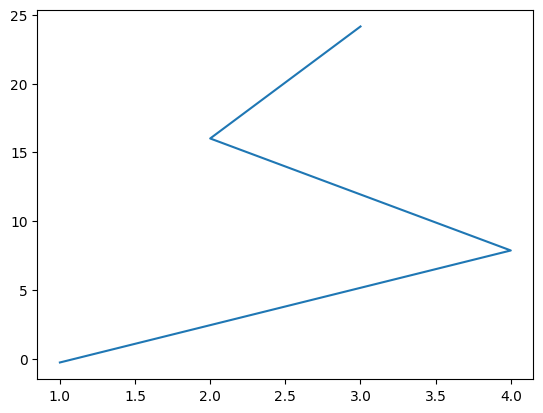

In [64]:
plt.plot(y, y_2)

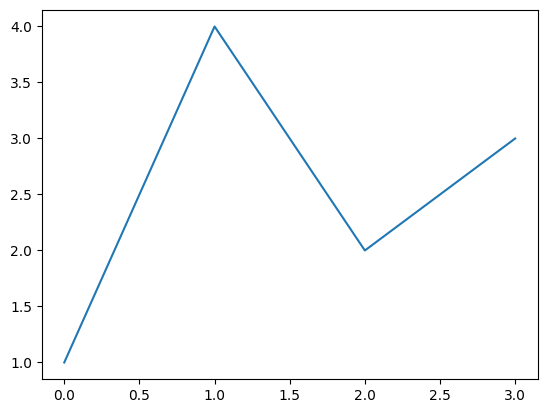

In [61]:
plt.plot(x, y)

In [3]:
res = stats.linregress(epsilon, sigma)
print(res.slope)
print(res.intercept)

8.145818181818182
-0.27809090909090917


**primero** nos definimos unas funciones para calcular las diferencias finitas. necesitamos las centradas adelantadas y atrasadas ya uqe tambien hay que evaluar la funcion en los extremos, aunque podriamos obviar esos puntos y hacerlo solo con las centradas

1. dentro de lso parametro que se dan, definimos el index_x_value (va a ser un array que contiene las distancias a cada punto de la malla) para que si el usuario pasa un parametro  0.23, lo aproxime al valor mas cercano de la malla queremos el indice no el valor mas cercano
2. como estamos en mallas esquispaciadas definimos una h que es el paso entre cada numerito de la malla

In [51]:
import numpy as np

def df1_centradas_segundo_orden(x: list[float] | tuple[float, ...],
                               y: list[float] | tuple[float, ...],
                               x_val : float):
    
    '''derivada primera para diferencias finitas
    centradas'''
    
    """"solo funciona con mallas equispaciadas"""

    index_x_value = np.abs(np.array(x) - x_val).argmin() #paso 1
    h = x[1] - x[0] #paso 2

    # valor de la izq - valor de la derecha dividido por el 2h
    return(y[index_x_value + 1] - y[index_x_value - 1]) / (2 * h) 

def df1_adelantadas_orden_1(x: list[float] | tuple[float, ...],
                            y: list[float] | tuple[float, ...],
                            x_val: float):
    '''Derivada primera para diferencias finitas
    adelantadas de primer orden'''
    index_x_value = np.abs(np.array(x) - x_val).argmin()  # Paso 1
    h = x[1] - x[0]  # Paso 2

    return (y[index_x_value + 1] - y[index_x_value]) / h


def df1_atrasadas_orden_1(x: list[float] | tuple[float, ...],
                          y: list[float] | tuple[float, ...],
                          x_val: float):
    '''Derivada primera para diferencias finitas
    atrasadas de primer orden'''
    index_x_value = np.abs(np.array(x) - x_val).argmin()  # Paso 1
    h = x[1] - x[0]  # Paso 2

    return (y[index_x_value] - y[index_x_value - 1]) / h

In [53]:
epsilon = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
sigma = [0.0, 0.252, 0.531, 0.840, 1.184, 1.558, 1.975, 2.444, 2.943, 3.500, 4.115]
len(epsilon)

11

In [55]:
x0 = [df1_adelantadas_orden_1(epsilon, sigma, epsilon[0])]
print(x0)
x_fin = [df1_atrasadas_orden_1(epsilon, sigma, epsilon[-1])]
print(x_fin)

x_mid = [df1_centradas_segundo_orden(epsilon, sigma, xi) for xi in epsilon[1:-1]]
print(x_mid)

derivative_sigma = x0 + x_mid + x_fin

len(derivative_sigma)

[5.04]
[12.300000000000004]
[5.31, 5.879999999999999, 6.5299999999999985, 7.180000000000001, 7.910000000000001, 8.859999999999998, 9.68, 10.56, 11.72]


11

In [56]:
answer = stats.linregress(sigma, derivative_sigma)
a = answer.intercept 
b = answer.slope
print(a, b)

4.989320601915316 1.8657570767723874


In [57]:
def evaluate_line(a, b, x):
    y = a + b * x
    return y

In [65]:
sigma_derivative_est = [evaluate_line(a,b, xi ) for xi in sigma]
sigma_derivative_est

[np.float64(4.989320601915316),
 np.float64(5.459491385261957),
 np.float64(5.980037609681454),
 np.float64(6.5565565464041216),
 np.float64(7.198376980813823),
 np.float64(7.896170127526696),
 np.float64(8.67419082854078),
 np.float64(9.54923089754703),
 np.float64(10.480243678856453),
 np.float64(11.519470370618672),
 np.float64(12.66691097283369)]

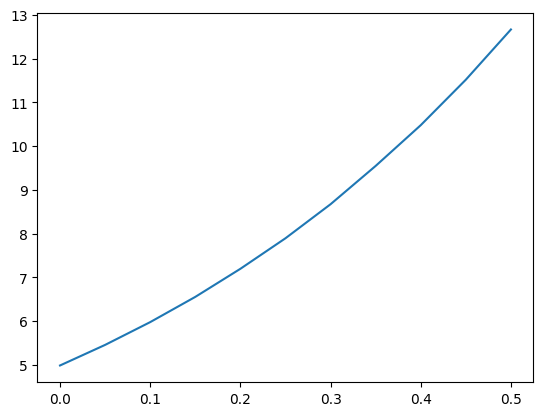

In [68]:
plt.plot(epsilon, sigma_derivative_est)
plt.show()